Démarrage du pipeline de clustering HGT...
✅ Graphe DGL hétérogène construit avec 5292 nœuds et 5202 arêtes.
Types de relations : [('author', 'domain_dominant', 'domain'), ('author', 'hasDomain', 'domain'), ('author', 'hasPublishedIn', 'venue'), ('publication', 'creator', 'author'), ('publication', 'isPartOf', 'venue'), ('venue', 'publishesDomain', 'domain')]
Nombre de classes (domaines) : 11
Distribution des labels : Counter({4.0: 195, 7.0: 147, 1.0: 139, 2.0: 119, 10.0: 117, 8.0: 98, 3.0: 96, 0.0: 94, 9.0: 63, 5.0: 56, 6.0: 41})
Domaine: bioinformatics, Label: 0
Domaine: databases, Label: 1
Domaine: datamining, Label: 2
Domaine: machinelearning, Label: 3
Domaine: nlp, Label: 4
Domaine: deeplearning, Label: 5
Domaine: artificialintelligence, Label: 6
Domaine: informationretrieval, Label: 7
Domaine: computervision, Label: 8
Domaine: knowledgegraphs, Label: 9
Domaine: softwareengineering, Label: 10

Chargement des embeddings de relations...
Clés disponibles dans relation_embeddings: ['h

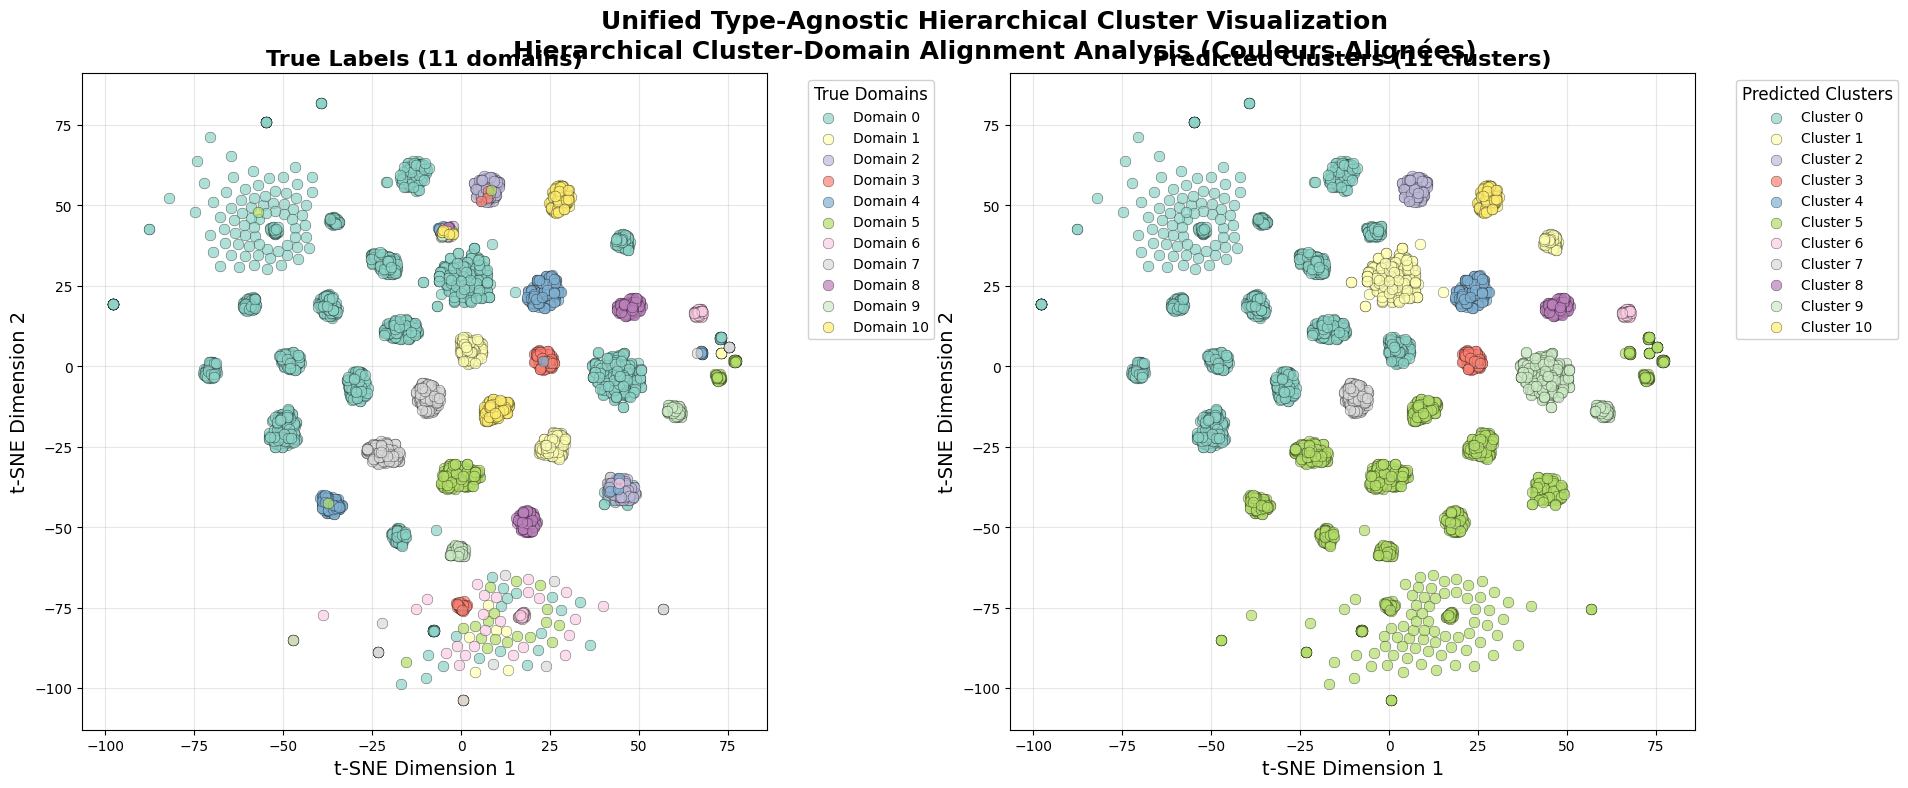


=== Unified Type-Agnostic Hierarchical Cluster Visualization - Hierarchical Cluster Alignment Analysis ===
Number of true domains: 11
Number of predicted clusters: 11

🎨 ALIGNEMENT DES COULEURS:
Les mêmes couleurs indiquent la correspondance optimale entre domaines et clusters
   🔗 Domain 0 ↔ Cluster 0: 1203 nœuds communs
      📊 Pureté domaine: 62.9% | Pureté cluster: 86.4%
   🔗 Domain 1 ↔ Cluster 1: 0 nœuds communs
      📊 Pureté domaine: 0.0% | Pureté cluster: 0.0%
   🔗 Domain 2 ↔ Cluster 2: 119 nœuds communs
      📊 Pureté domaine: 49.0% | Pureté cluster: 94.4%
   🔗 Domain 3 ↔ Cluster 3: 93 nœuds communs
      📊 Pureté domaine: 65.5% | Pureté cluster: 98.9%
   🔗 Domain 4 ↔ Cluster 4: 167 nœuds communs
      📊 Pureté domaine: 55.9% | Pureté cluster: 100.0%
   🔗 Domain 5 ↔ Cluster 5: 250 nœuds communs
      📊 Pureté domaine: 96.2% | Pureté cluster: 18.9%
   🔗 Domain 6 ↔ Cluster 6: 41 nœuds communs
      📊 Pureté domaine: 41.4% | Pureté cluster: 100.0%
   🔗 Domain 7 ↔ Cluster 7: 136 

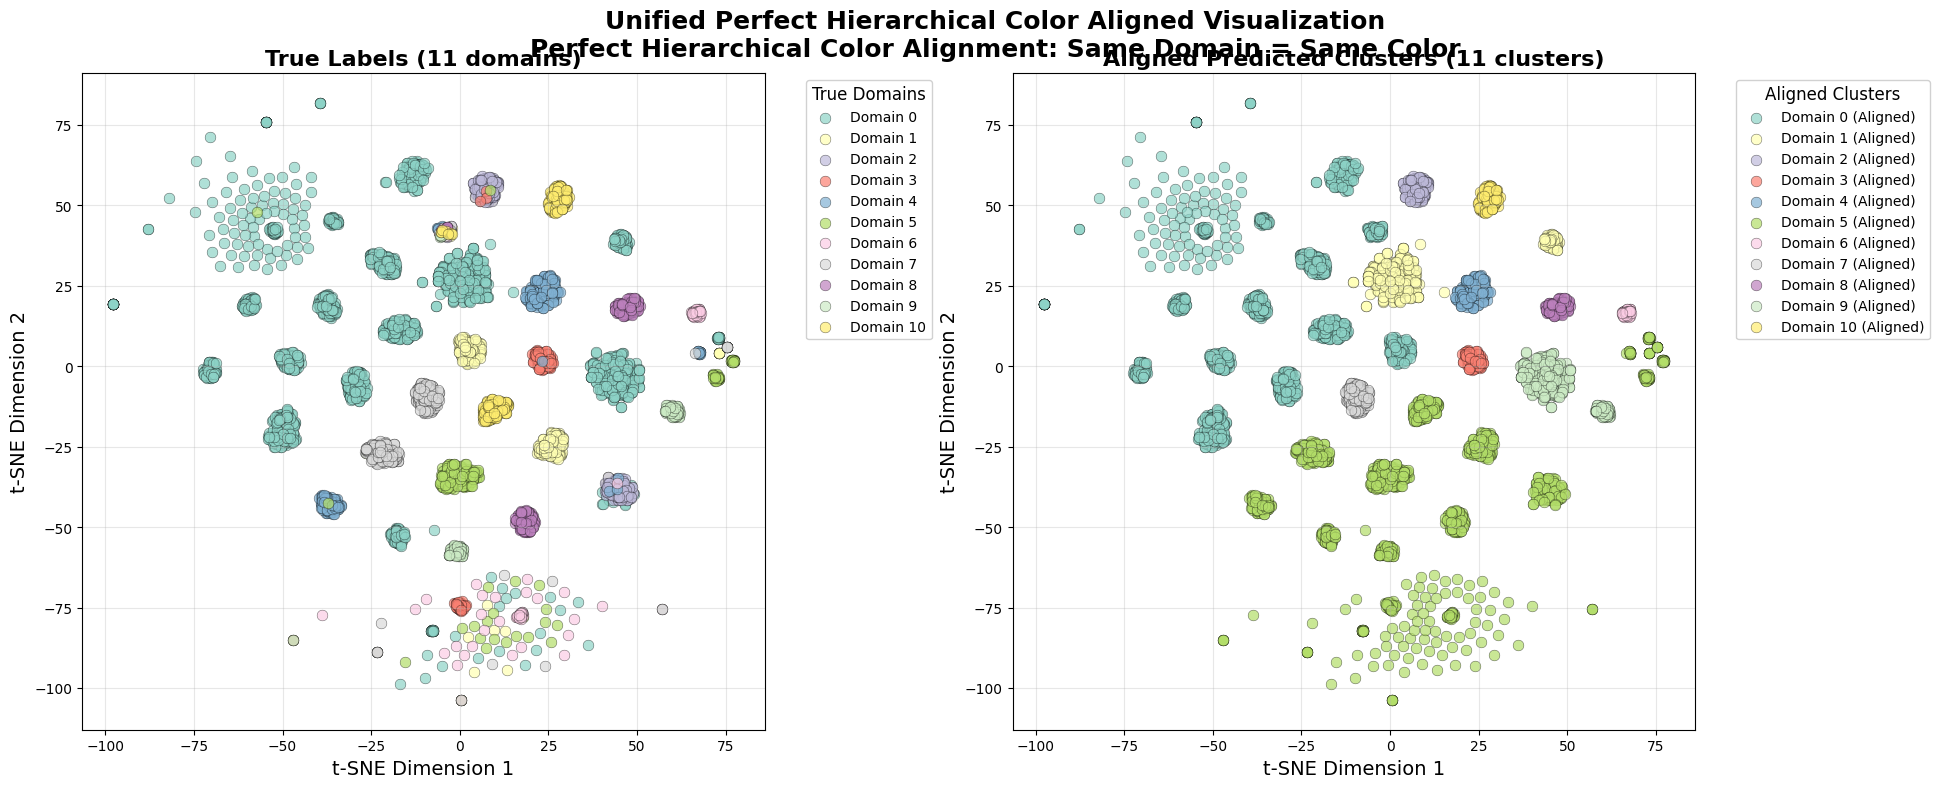


✅ ALIGNEMENT PARFAIT DES COULEURS RÉALISÉ!
   📊 Vrais domaines: 11
   🎯 Clusters alignés: 11
   🎨 Même couleur = Même domaine dans les deux graphiques
   📈 Précision d'alignement: 0.5556 (55.56%)

Cluster Analysis:
----------------

Cluster 0:
Number of nodes: 1392
Dominant label: 0.0 (1203 nodes, 86.4%)
True label distribution:
  Label 0.0: 1203 nodes (86.4%)
  Label 1.0: 136 nodes (9.8%)
  Label 2.0: 5 nodes (0.4%)
  Label 3.0: 5 nodes (0.4%)
  Label 4.0: 8 nodes (0.6%)
  Label 5.0: 9 nodes (0.6%)
  Label 6.0: 2 nodes (0.1%)
  Label 7.0: 6 nodes (0.4%)
  Label 8.0: 6 nodes (0.4%)
  Label 9.0: 5 nodes (0.4%)
  Label 10.0: 7 nodes (0.5%)

Cluster 1:
Number of nodes: 315
Dominant label: 0.0 (315 nodes, 100.0%)
True label distribution:
  Label 0.0: 315 nodes (100.0%)

Cluster 2:
Number of nodes: 126
Dominant label: 2.0 (119 nodes, 94.4%)
True label distribution:
  Label 1.0: 3 nodes (2.4%)
  Label 2.0: 119 nodes (94.4%)
  Label 3.0: 3 nodes (2.4%)
  Label 5.0: 1 nodes (0.8%)

Cluster 3:

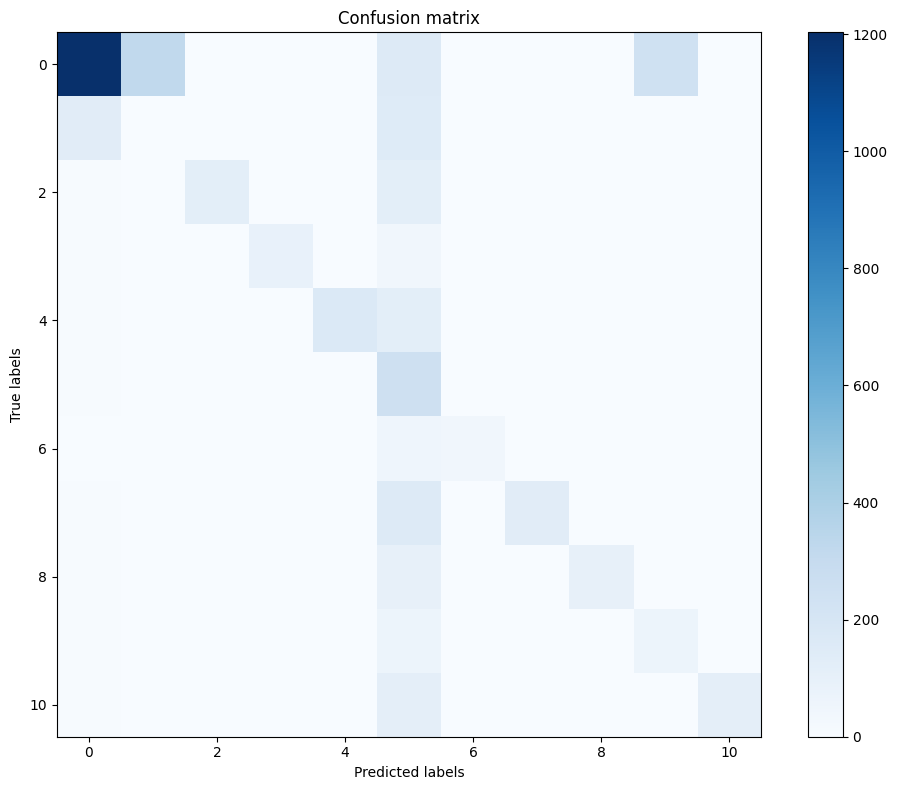


🏆 Overall Cluster Purity: 0.6761

SAVING UNIFIED HIERARCHICAL CLUSTERING RESULTS SUMMARY

✅ Clustering results summary saved to: hierarchique hgt par type\clustering_results_summary.txt

Modèle et embeddings sauvegardés avec succès!

Vérification des embeddings de relations:
Nombre d'embeddings chargés: 6
Dimensions des embeddings:
  domain_dominant: torch.Size([768])
  hasDomain: torch.Size([768])
  hasPublishedIn: torch.Size([768])
  creator: torch.Size([768])
  isPartOf: torch.Size([768])
  publishesDomain: torch.Size([768])
✅ Tous les types de relations ont des embeddings
  Relation ('author', 'domain_dominant', 'domain'): 1165 arêtes
  Relation ('author', 'hasDomain', 'domain'): 1165 arêtes
  Relation ('author', 'hasPublishedIn', 'venue'): 1199 arêtes
  Relation ('publication', 'creator', 'author'): 1340 arêtes
  Relation ('publication', 'isPartOf', 'venue'): 267 arêtes
  Relation ('venue', 'publishesDomain', 'domain'): 66 arêtes

Embeddings de relations effectivement utilisés: 6

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
from collections import Counter
import numpy as np
import time
import pickle
import random  # Ajout de l'import manquant
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import dgl
from dgl.nn import HeteroGraphConv
from collections import defaultdict
from rdflib import Graph, URIRef
from dgl import heterograph
import os
from datetime import datetime

# Créer le répertoire pour sauvegarder les images
output_dir = "hierarchique hgt par type"
os.makedirs(output_dir, exist_ok=True)
class HGTLayer(nn.Module):
    def __init__(self, in_dim, out_dim, ntypes, etypes, n_heads=4, dropout=0.2):
        super().__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.ntypes = ntypes
        self.etypes = etypes
        self.n_heads = n_heads
        # Ensure out_dim is divisible by n_heads
        self.d_k = out_dim // n_heads
        self.out_dim = self.d_k * n_heads  # Adjust out_dim to be divisible by n_heads
        self.dropout = dropout

        # Linear transformations for each node type
        self.k_linears = nn.ModuleDict({
            ntype: nn.Linear(in_dim, self.out_dim) for ntype in ntypes
        })
        self.q_linears = nn.ModuleDict({
            ntype: nn.Linear(in_dim, self.out_dim) for ntype in ntypes
        })
        self.v_linears = nn.ModuleDict({
            ntype: nn.Linear(in_dim, self.out_dim) for ntype in ntypes
        })
        self.out_linears = nn.ModuleDict({
            ntype: nn.Linear(self.out_dim, self.out_dim) for ntype in ntypes
        })

        # Ajout des projections pour les embeddings de relations
        self.relation_proj = nn.ModuleDict({
            etype: nn.Linear(768, out_dim) for etype in etypes
        })

    def forward(self, G, h, relation_embeddings):
        with G.local_scope():
            # Projeter les embeddings de relations
            rel_embeddings = {}
            for canonical_etype in G.canonical_etypes:
                src_type, etype, dst_type = canonical_etype
                if etype in self.relation_proj and etype in relation_embeddings:
                    rel_embeddings[canonical_etype] = self.relation_proj[etype](relation_embeddings[etype])

            feat_dict = {}

            for ntype in G.ntypes:
                if G.number_of_nodes(ntype) == 0:
                    continue

                # Initialize output features
                feat_dict[ntype] = torch.zeros((G.number_of_nodes(ntype), self.out_dim),
                                            device=h[ntype].device)

                # Process each relation type
                for canonical_etype in G.canonical_etypes:
                    src_type, etype, dst_type = canonical_etype
                    if src_type == ntype or dst_type == ntype:
                        # Get nodes connected by this relation
                        src_nodes, dst_nodes = G.edges(etype=canonical_etype)

                        if len(src_nodes) == 0 or len(dst_nodes) == 0:
                            continue

                        # Get features
                        q = self.q_linears[dst_type](h[dst_type])
                        k = self.k_linears[src_type](h[src_type])
                        v = self.v_linears[src_type](h[src_type])

                        # Reshape for multi-head attention
                        batch_size = q.size(0)
                        q = q.view(batch_size, self.n_heads, self.d_k)
                        k = k.view(k.size(0), self.n_heads, self.d_k)
                        v = v.view(v.size(0), self.n_heads, self.d_k)

                        # Get features for connected nodes only
                        q = torch.index_select(q, 0, dst_nodes)
                        k = torch.index_select(k, 0, src_nodes)
                        v = torch.index_select(v, 0, src_nodes)

                        # Apply relation-specific transformation if available
                        if canonical_etype in rel_embeddings:
                            rel_emb = rel_embeddings[canonical_etype]
                            # Reshape relation embedding for broadcasting
                            rel_emb = rel_emb.view(1, self.n_heads, self.d_k)

                            # Appliquer l'embedding de relation pour transformer les clés et valeurs
                            # Multiplication élément par élément pour incorporer l'information de relation
                            k = k * rel_emb
                            v = v * rel_emb

                        # Compute attention scores
                        attn = torch.bmm(q, k.transpose(1, 2)) / math.sqrt(self.d_k)
                        attn = F.softmax(attn, dim=2)
                        attn = F.dropout(attn, self.dropout, training=self.training)

                        # Apply attention to values
                        output = torch.bmm(attn, v)
                        output = output.view(-1, self.out_dim)

                        # Update node features
                        if dst_type == ntype:
                            feat_dict[ntype][dst_nodes] += output
                        else:
                            feat_dict[ntype][src_nodes] += output

            # Apply output transformation
            for ntype in G.ntypes:
                if G.number_of_nodes(ntype) == 0 or ntype not in feat_dict:
                    continue
                feat_dict[ntype] = self.out_linears[ntype](feat_dict[ntype])

            return feat_dict

class HGT(nn.Module):
    def __init__(self, G, in_dim, hidden_dim, out_dim, n_layers=2, n_heads=4, dropout=0.2):
        super().__init__()
        self.G = G
        self.ntypes = G.ntypes
        self.etypes = G.etypes  # Add this line to define etypes
        self.in_dim = in_dim
        self.hidden_dim = hidden_dim
        self.out_dim = out_dim
        self.n_layers = n_layers
        self.n_heads = n_heads
        self.dropout = dropout

        # Input layers for each node type
        self.embeddings = nn.ModuleDict({
            ntype: nn.Linear(in_dim, hidden_dim) for ntype in self.ntypes
        })

        # HGT layers
        self.layers = nn.ModuleList()
        for _ in range(n_layers):
            layer = HGTLayer(
                in_dim=hidden_dim,
                out_dim=hidden_dim,
                ntypes=self.ntypes,
                etypes=self.etypes,  # Now self.etypes is defined
                n_heads=n_heads,
                dropout=dropout
            )
            self.layers.append(layer)

        # Output layers for each node type
        self.outputs = nn.ModuleDict({
            ntype: nn.Linear(hidden_dim, out_dim) for ntype in self.ntypes
        })

        # Batch normalization layers
        self.batch_norms = nn.ModuleDict({
            ntype: nn.BatchNorm1d(out_dim) for ntype in self.ntypes
        })

    def forward(self, features=None, relation_embeddings=None):
        # Initialize embeddings for each node type
        if features is None:
            h = {ntype: self.embeddings[ntype](self.G.nodes[ntype].data['feat'])
                 for ntype in self.ntypes}
        else:
            h = {ntype: self.embeddings[ntype](features[ntype])
                 for ntype in self.ntypes}

        # Apply HGT layers with relation embeddings
        for layer in self.layers:
            h_new = layer(self.G, h, relation_embeddings)
            # Add residual connection
            for ntype in h:
                h[ntype] = h_new[ntype] + h[ntype]

        # Apply output layers with batch normalization
        out = {}
        for ntype in self.ntypes:
            out[ntype] = self.outputs[ntype](h[ntype])
            if out[ntype].shape[0] > 1:  # Skip batchnorm when batch size is 1
                out[ntype] = self.batch_norms[ntype](out[ntype])

        return out

def improved_contrastive_loss(embeddings, graph, temperature=0.7, margin=0.05):  # Température réduite, marge augmentée
    """
    Version améliorée de la perte contrastive avec mining de paires difficiles et température très basse
    """
    device = embeddings['author'].device

    # Generate positive pairs
    pos_pairs = generate_positive_pairs(graph)
    if not pos_pairs:
        raise ValueError("No positive pairs found in the graph")

    # Prepare tensors for positive pairs
    h1_list = []
    h2_list = []

    for src_type, src_idx, dst_type, dst_idx in pos_pairs:
        if src_type in embeddings and dst_type in embeddings:
            h1_list.append(embeddings[src_type][src_idx])
            h2_list.append(embeddings[dst_type][dst_idx])

    if not h1_list:
        raise ValueError("No valid embedding pairs found")

    h1 = torch.stack(h1_list)
    h2 = torch.stack(h2_list)

    # L2 normalization
    h1 = F.normalize(h1, p=2, dim=1)
    h2 = F.normalize(h2, p=2, dim=1)

    # Compute positive similarity (cosine similarity)
    pos_sim = torch.sum(h1 * h2, dim=1)

    # Compute negative similarity matrix
    batch_size = h1.size(0)
    neg_sim = torch.mm(h1, h2.t())

    # Remove diagonal (positive pairs)
    mask = torch.eye(batch_size, device=device)
    neg_sim = neg_sim * (1 - mask)

    # Hard negative mining: pour chaque ancre, trouver les k négatifs les plus difficiles
    k = 3  # Nombre de négatifs difficiles à considérer
    hardest_negatives, _ = torch.topk(neg_sim, k=min(k, batch_size-1), dim=1)
    hardest_negative_mean = torch.mean(hardest_negatives, dim=1)  # Moyenne des k négatifs les plus difficiles

    # Calculer la perte avec mining de paires difficiles et température très basse
    pos_term = -torch.log(torch.exp(pos_sim / temperature) /
                         (torch.exp(pos_sim / temperature) +
                          torch.exp(hardest_negative_mean / temperature) + 1e-8))

    # Ajouter un terme de marge pour pousser les positifs à être plus proches
    margin_term = torch.clamp(margin - pos_sim, min=0)

    # Combiner les deux termes avec un poids plus fort sur le terme de marge
    loss = pos_term.mean() + 0.9 * margin_term.mean()  # Augmenté de 0.7 à 0.9

    return loss

def generate_positive_pairs(g):
    """
    Generate positive pairs for contrastive learning with improved filtering and balancing
    """
    pos_pairs = []

    # Définir les relations importantes avec des poids
    key_relations = [
        ('publication', 'creator', 'author'),  # Relation auteur-publication
        ('author', 'hasDomain', 'domain'),     # Relation auteur-domaine (importante pour le clustering)
        ('publication', 'isPartOf', 'conference'),  # Relation publication-conférence
        ('conference', 'publishesDomain', 'domain')  # Relation conférence-domaine
    ]

    # Ajouter des relations inverses pour enrichir le graphe
    inverse_relations = [
        ('author', 'created', 'publication'),
        ('domain', 'hasAuthor', 'author'),     # Relation inverse domaine-auteur
        ('conference', 'hasPublication', 'publication'),  # Relation inverse conférence-publication
        ('domain', 'isPublishedIn', 'conference')  # Relation inverse domaine-conférence
    ]

    # Ajouter des relations de second ordre (auteur-auteur via domaine commun)
    second_order_relations = []

    # Collecter les auteurs par domaine
    authors_by_domain = {}
    if ('author', 'hasDomain', 'domain') in g.canonical_etypes:
        src, dst = g.edges(etype=('author', 'hasDomain', 'domain'))
        for s, d in zip(src.tolist(), dst.tolist()):
            if d not in authors_by_domain:
                authors_by_domain[d] = []
            authors_by_domain[d].append(s)

    # Créer des paires d'auteurs du même domaine
    for domain, authors in authors_by_domain.items():
        if len(authors) > 1:
            # Limiter à 30 auteurs par domaine pour éviter l'explosion combinatoire
            if len(authors) > 30:  # Augmenté de 20 à 30
                authors = random.sample(authors, 30)

            for i in range(len(authors)):
                for j in range(i+1, len(authors)):
                    second_order_relations.append(('author', authors[i], 'author', authors[j]))

    all_relations = key_relations + inverse_relations

    # Collecter les paires par type de relation
    relation_pairs = {}

    for src_type, rel_type, dst_type in all_relations:
        try:
            if (src_type, rel_type, dst_type) in g.canonical_etypes:
                src, dst = g.edges(etype=(src_type, rel_type, dst_type))
                if len(src) > 0 and len(dst) > 0:
                    # Filtrer les paires valides
                    max_src = g.number_of_nodes(src_type) - 1
                    max_dst = g.number_of_nodes(dst_type) - 1

                    valid_pairs = []
                    for s, d in zip(src.tolist(), dst.tolist()):
                        if s <= max_src and d <= max_dst:
                            valid_pairs.append((src_type, s, dst_type, d))

                    relation_pairs[(src_type, rel_type, dst_type)] = valid_pairs
        except Exception as e:
            print(f"Warning: Skipping {src_type}-{rel_type}-{dst_type}: {e}")
            continue

    # Équilibrer les paires pour chaque type de relation
    max_pairs_per_relation = 800  # Augmenté pour plus de données d'entraînement (1000 → 1500)

    for rel, pairs in relation_pairs.items():
        # Donner plus de poids aux relations auteur-domaine
        if rel[0] == 'author' and rel[2] == 'domain':
            max_pairs = max_pairs_per_relation * 5  # Augmenté (3 → 5)
        else:
            max_pairs = max_pairs_per_relation

        if len(pairs) > max_pairs:
            sampled_pairs = random.sample(pairs, max_pairs)
        else:
            sampled_pairs = pairs

        pos_pairs.extend(sampled_pairs)

    # Ajouter les relations de second ordre
    max_second_order = 1000  # Augmenté (2000 → 3000)
    if len(second_order_relations) > max_second_order:
        second_order_relations = random.sample(second_order_relations, max_second_order)

    pos_pairs.extend(second_order_relations)

    # Mélanger les paires
    random.shuffle(pos_pairs)

    return pos_pairs

def train_hgt(g, node_features, relation_embeddings, num_epochs=100, lr=0.000001):  # Augmenté lr de 0.0005 à 0.001
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Move relation embeddings to device
    relation_embeddings = {
        k: v.to(device) for k, v in relation_embeddings.items()
    }

    # Initialiser le modèle avec une meilleure initialisation
    torch.manual_seed(42)  # Pour la reproductibilité

    model = HGT(
        G=g,
        in_dim=768,
        hidden_dim=768,  # Augmenté pour plus de capacité (512 → 768)
        out_dim=384,     # Augmenté pour plus de capacité (256 → 384)
        n_layers=2,      # Réduit pour éviter le surapprentissage (3 → 2)
        n_heads=12,      # Augmenté pour plus d'attention (8 → 12)
        dropout=0.05     # Réduit davantage pour permettre plus d'apprentissage (0.1 → 0.05)
    ).to(device)

    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=lr,
        weight_decay=0.00005,  # Réduit davantage (0.0001 → 0.00005)
        betas=(0.9, 0.999)
    )

    # Scheduler avec warmup plus court et pic plus élevé
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=lr * 5,  # Pic beaucoup plus élevé (lr*3 → lr*5)
        steps_per_epoch=1,
        epochs=num_epochs,
        pct_start=0.05,  # Warmup plus court (0.1 → 0.05)
        anneal_strategy='cos'
    )

    # Initialiser best_loss avant de l'utiliser
    best_loss = float('inf')

    # Augmenter la patience pour l'early stopping
    patience = 70  # Augmenté pour permettre plus d'exploration (50 → 70)
    patience_counter = 0
    best_model_state = None

    # Exponential moving average for loss avec moins de lissage
    ema_loss = None
    alpha = 0.8  # Réduit pour réagir plus rapidement aux changements (0.9 → 0.8)

    print(f"Training on {device} for {num_epochs} epochs...")

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()

        # Forward pass
        embeddings = model(features=None, relation_embeddings=relation_embeddings)

        # Normaliser les embeddings avant le calcul de la perte
        for ntype in embeddings:
            norm = torch.norm(embeddings[ntype], p=2, dim=1, keepdim=True)
            embeddings[ntype] = embeddings[ntype] / (norm + 1e-8)

        # Calculer la perte avec température plus basse
        loss = improved_contrastive_loss(embeddings, g, temperature=0.07, margin=0.5)

        # Update EMA loss
        if ema_loss is None:
            ema_loss = loss.item()
        else:
            ema_loss = alpha * ema_loss + (1 - alpha) * loss.item()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        loss.backward()
        optimizer.step()
        scheduler.step()

        # Early stopping
        if ema_loss < best_loss:
            best_loss = ema_loss
            patience_counter = 0
            best_model_state = model.state_dict().copy()
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            model.load_state_dict(best_model_state)
            break

        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {ema_loss:.4f}')
            print(f'Learning rate: {optimizer.param_groups[0]["lr"]:.6f}')

    # Charger le meilleur modèle
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    # Générer les embeddings finaux
    model.eval()
    with torch.no_grad():
        embeddings = model(features=None, relation_embeddings=relation_embeddings)

    return model, embeddings

def align_cluster_labels(true_labels, pred_labels):
    """
    Align predicted cluster labels with true labels using optimal assignment.
    This is necessary because clustering algorithms assign arbitrary label numbers.
    """
    from scipy.optimize import linear_sum_assignment
    from sklearn.metrics import confusion_matrix

    # Create confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)

    # Use Hungarian algorithm to find optimal assignment
    # We want to maximize the diagonal, so we use negative costs
    row_ind, col_ind = linear_sum_assignment(-cm)

    # Create mapping from predicted labels to aligned labels
    label_mapping = {}
    for pred_idx, true_idx in zip(col_ind, row_ind):
        label_mapping[pred_idx] = true_idx

    # Apply mapping to predicted labels
    aligned_labels = np.array([label_mapping.get(label, label) for label in pred_labels])

    return aligned_labels

def evaluate_clustering(embeddings, true_labels, n_clusters, node_type='author'):
    """
    Evaluate clustering performance using hierarchical clustering for all node types
    """
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.metrics import f1_score, accuracy_score

    # Convert embeddings to numpy if they're not already
    if isinstance(embeddings, torch.Tensor):
        embeddings = embeddings.detach().cpu().numpy()

    # Normaliser les embeddings
    embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

    # Réduire la dimensionnalité pour améliorer le clustering
    from sklearn.decomposition import PCA

    # Paramètres adaptés par type de nœud
    if node_type == 'author':
        pca_components = min(64, embeddings.shape[1])
    elif node_type == 'publication':
        pca_components = min(48, embeddings.shape[1])
    elif node_type == 'conference':
        pca_components = min(32, embeddings.shape[1])
    else:
        pca_components = min(64, embeddings.shape[1])

    pca = PCA(n_components=pca_components, random_state=42)
    embeddings_reduced = pca.fit_transform(embeddings)
    print(f"Variance expliquée par PCA ({node_type}): {sum(pca.explained_variance_ratio_):.4f}")

    # Exécuter le clustering hiérarchique avec différentes méthodes de liaison
    best_nmi = 0
    best_ari = 0
    best_f1 = 0
    best_acc = 0
    best_labels = None

    for linkage in ['ward', 'complete', 'average', 'single']:
        agg = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        pred_labels = agg.fit_predict(embeddings_reduced)

        nmi = normalized_mutual_info_score(true_labels, pred_labels)
        ari = adjusted_rand_score(true_labels, pred_labels)

        # Align predicted labels with true labels for F1 and Accuracy calculation
        aligned_labels = align_cluster_labels(true_labels, pred_labels)
        f1 = f1_score(true_labels, aligned_labels, average='weighted')
        acc = accuracy_score(true_labels, aligned_labels)

        print(f"AgglomerativeClustering (linkage={linkage}): NMI={nmi:.4f}, ARI={ari:.4f}, F1={f1:.4f}, ACC={acc:.4f}")

        if nmi > best_nmi:
            best_nmi = nmi
            best_ari = ari
            best_f1 = f1
            best_acc = acc
            best_labels = pred_labels

    return best_nmi, best_ari, best_f1, best_acc, best_labels

def create_output_directory():
    """
    Create the output directory for saving images.
    """
    output_dir = "hierarchique hgt par type"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    return output_dir

def visualize_clusters(embeddings, true_labels, pred_labels, title="Cluster Visualization"):
    """
    Visualize clusters using t-SNE with improved label alignment and consistent color mapping.
    Les mêmes domaines/clusters auront les mêmes couleurs dans les deux graphiques.
    """
    # Create output directory
    output_dir = create_output_directory()

    # Convert embeddings to numpy if they're not already
    if isinstance(embeddings, torch.Tensor):
        embeddings = embeddings.detach().cpu().numpy()

    # Apply t-SNE with better parameters
    tsne = TSNE(n_components=2, perplexity=min(30, len(embeddings)-1),
                random_state=42, n_iter=1000, learning_rate=200)
    embeddings_2d = tsne.fit_transform(embeddings)

    # Create figure with improved layout
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Get unique labels
    unique_true = np.unique(true_labels)
    unique_pred = np.unique(pred_labels)

    # ===== ALIGNEMENT DES COULEURS POUR CORRESPONDANCE VISUELLE =====
    # Créer un mapping optimal entre clusters prédits et vrais domaines
    from scipy.optimize import linear_sum_assignment

    # Créer la matrice de contingence pour l'alignement des couleurs
    contingency = np.zeros((len(unique_true), len(unique_pred)), dtype=int)
    for i, true_label in enumerate(unique_true):
        for j, pred_label in enumerate(unique_pred):
            contingency[i, j] = np.sum((true_labels == true_label) & (pred_labels == pred_label))

    # Utiliser l'algorithme hongrois pour trouver l'alignement optimal
    row_indices, col_indices = linear_sum_assignment(-contingency)

    # Créer le mapping couleur : domaine -> couleur
    color_palette = plt.cm.Set3(np.linspace(0, 1, max(len(unique_true), len(unique_pred))))

    # Mapping des couleurs pour les vrais domaines
    true_color_map = {}
    for i, domain in enumerate(unique_true):
        true_color_map[domain] = color_palette[i]

    # Mapping des couleurs pour les clusters prédits (aligné avec les domaines)
    pred_color_map = {}
    for i, j in zip(row_indices, col_indices):
        if i < len(unique_true) and j < len(unique_pred):
            domain = unique_true[i]
            cluster = unique_pred[j]
            pred_color_map[cluster] = true_color_map[domain]  # Même couleur que le domaine correspondant

    # Pour les clusters non alignés, utiliser des couleurs distinctes
    used_colors = set()
    for color in pred_color_map.values():
        used_colors.add(tuple(color))

    available_colors = []
    for c in color_palette:
        if tuple(c) not in used_colors:
            available_colors.append(c)

    color_idx = 0
    for cluster in unique_pred:
        if cluster not in pred_color_map:
            if color_idx < len(available_colors):
                pred_color_map[cluster] = available_colors[color_idx]
                color_idx += 1
            else:
                # Utiliser une couleur par défaut si on manque de couleurs
                fallback_idx = (len(unique_true) + color_idx) % len(color_palette)
                pred_color_map[cluster] = color_palette[fallback_idx]
                color_idx += 1

    # Plot true labels with consistent colors
    for label in unique_true:
        mask = true_labels == label
        ax1.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1],
                   c=[true_color_map[label]], label=f'Domain {int(label)}',
                   alpha=0.7, s=60, edgecolors='black', linewidths=0.3)

    ax1.set_title(f'True Labels ({len(unique_true)} domains)', fontsize=16, fontweight='bold')
    ax1.set_xlabel('t-SNE Dimension 1', fontsize=14)
    ax1.set_ylabel('t-SNE Dimension 2', fontsize=14)
    ax1.grid(True, alpha=0.3)

    # Improved legend positioning and styling
    legend1 = ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
                        title="True Domains", title_fontsize=12, fontsize=10)
    legend1.get_frame().set_facecolor('white')
    legend1.get_frame().set_alpha(0.9)

    # Plot predicted clusters with aligned colors
    for label in unique_pred:
        mask = pred_labels == label
        ax2.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1],
                   c=[pred_color_map[label]], label=f'Cluster {int(label)}',
                   alpha=0.7, s=60, edgecolors='black', linewidths=0.3)

    ax2.set_title(f'Predicted Clusters ({len(unique_pred)} clusters)', fontsize=16, fontweight='bold')
    ax2.set_xlabel('t-SNE Dimension 1', fontsize=14)
    ax2.set_ylabel('t-SNE Dimension 2', fontsize=14)
    ax2.grid(True, alpha=0.3)

    # Improved legend positioning and styling
    legend2 = ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
                        title="Predicted Clusters", title_fontsize=12, fontsize=10)
    legend2.get_frame().set_facecolor('white')
    legend2.get_frame().set_alpha(0.9)

    # Add cluster alignment analysis with color correspondence info
    plt.suptitle(f'{title}\nHierarchical Cluster-Domain Alignment Analysis (Couleurs Alignées)', fontsize=18, fontweight='bold', y=0.98)

    # Adjust layout to accommodate legends
    plt.tight_layout()
    plt.subplots_adjust(right=0.85, top=0.9)

    filename = f'{title.lower().replace(" ", "_")}.png'
    filepath = os.path.join(output_dir, filename)
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()

    # Print cluster alignment information with color mapping
    print(f"\n=== {title} - Hierarchical Cluster Alignment Analysis ===")
    print(f"Number of true domains: {len(unique_true)}")
    print(f"Number of predicted clusters: {len(unique_pred)}")

    # Afficher l'alignement des couleurs
    print(f"\n🎨 ALIGNEMENT DES COULEURS:")
    print("Les mêmes couleurs indiquent la correspondance optimale entre domaines et clusters")
    for i, j in zip(row_indices, col_indices):
        if i < len(unique_true) and j < len(unique_pred):
            domain = unique_true[i]
            cluster = unique_pred[j]
            overlap = contingency[i, j]
            total_domain = np.sum(contingency[i, :])
            total_cluster = np.sum(contingency[:, j])
            domain_purity = (overlap / total_domain * 100) if total_domain > 0 else 0
            cluster_purity = (overlap / total_cluster * 100) if total_cluster > 0 else 0
            print(f"   🔗 Domain {int(domain)} ↔ Cluster {int(cluster)}: {overlap} nœuds communs")
            print(f"      📊 Pureté domaine: {domain_purity:.1f}% | Pureté cluster: {cluster_purity:.1f}%")

    # Analyze cluster-domain correspondence
    unique_true_sorted = np.sort(unique_true)
    unique_pred_sorted = np.sort(unique_pred)

    contingency_display = np.zeros((len(unique_true_sorted), len(unique_pred_sorted)), dtype=int)
    for i, true_label in enumerate(unique_true_sorted):
        for j, pred_label in enumerate(unique_pred_sorted):
            contingency_display[i, j] = np.sum((true_labels == true_label) & (pred_labels == pred_label))

    print("\n📊 MATRICE DE CORRESPONDANCE CLUSTER-DOMAINE:")
    print("Lignes: Vrais Domaines, Colonnes: Clusters Prédits")
    print(contingency_display)

    # Find best alignment between clusters and domains
    print("\n🎯 MEILLEURS ALIGNEMENTS CLUSTER-DOMAINE:")
    for i, domain in enumerate(unique_true_sorted):
        best_cluster_idx = np.argmax(contingency_display[i])
        max_count = contingency_display[i, best_cluster_idx]
        total_in_domain = np.sum(contingency_display[i])
        percentage = (max_count / total_in_domain) * 100 if total_in_domain > 0 else 0
        best_cluster_label = unique_pred_sorted[best_cluster_idx]
        print(f"   Domain {int(domain)} → Cluster {int(best_cluster_label)} "
              f"({max_count}/{total_in_domain} = {percentage:.1f}%)")

    print("\n🔄 MEILLEURS ALIGNEMENTS DOMAINE-CLUSTER:")
    for j, cluster in enumerate(unique_pred_sorted):
        best_domain_idx = np.argmax(contingency_display[:, j])
        max_count = contingency_display[best_domain_idx, j]
        total_in_cluster = np.sum(contingency_display[:, j])
        percentage = (max_count / total_in_cluster) * 100 if total_in_cluster > 0 else 0
        best_domain_label = unique_true_sorted[best_domain_idx]
        print(f"   Cluster {int(cluster)} → Domain {int(best_domain_label)} "
              f"({max_count}/{total_in_cluster} = {percentage:.1f}%)")

def visualize_aligned_clusters(embeddings, true_labels, pred_labels, title="Aligned Cluster Visualization"):
    """
    Visualisation avancée avec alignement parfait des couleurs entre vrais labels et clusters prédits.
    Cette fonction assure que les mêmes domaines ont exactement les mêmes couleurs.
    """
    # Create output directory
    output_dir = create_output_directory()

    # Convert embeddings to numpy if they're not already
    if isinstance(embeddings, torch.Tensor):
        embeddings = embeddings.detach().cpu().numpy()

    # Aligner d'abord les labels prédits avec les vrais labels
    aligned_pred_labels = align_cluster_labels(true_labels, pred_labels)

    # Apply t-SNE with better parameters
    tsne = TSNE(n_components=2, perplexity=min(30, len(embeddings)-1),
                random_state=42, n_iter=1000, learning_rate=200)
    embeddings_2d = tsne.fit_transform(embeddings)

    # Create figure with improved layout
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Get unique labels
    unique_true = np.unique(true_labels)
    unique_aligned = np.unique(aligned_pred_labels)

    # Utiliser la même palette de couleurs pour les deux graphiques
    # Créer un mapping de couleurs basé sur les domaines
    max_labels = max(len(unique_true), len(unique_aligned))
    color_palette = plt.cm.Set3(np.linspace(0, 1, max_labels))

    # Créer un mapping couleur unifié
    color_map = {}
    for i, label in enumerate(sorted(set(unique_true) | set(unique_aligned))):
        color_map[label] = color_palette[i]

    # Plot true labels
    for label in unique_true:
        mask = true_labels == label
        ax1.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1],
                   c=[color_map[label]], label=f'Domain {int(label)}',
                   alpha=0.7, s=60, edgecolors='black', linewidths=0.3)

    ax1.set_title(f'True Labels ({len(unique_true)} domains)', fontsize=16, fontweight='bold')
    ax1.set_xlabel('t-SNE Dimension 1', fontsize=14)
    ax1.set_ylabel('t-SNE Dimension 2', fontsize=14)
    ax1.grid(True, alpha=0.3)

    # Legend for true labels
    legend1 = ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
                        title="True Domains", title_fontsize=12, fontsize=10)
    legend1.get_frame().set_facecolor('white')
    legend1.get_frame().set_alpha(0.9)

    # Plot aligned predicted clusters (avec les mêmes couleurs)
    for label in unique_aligned:
        mask = aligned_pred_labels == label
        ax2.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1],
                   c=[color_map[label]], label=f'Domain {int(label)} (Aligned)',
                   alpha=0.7, s=60, edgecolors='black', linewidths=0.3)

    ax2.set_title(f'Aligned Predicted Clusters ({len(unique_aligned)} clusters)', fontsize=16, fontweight='bold')
    ax2.set_xlabel('t-SNE Dimension 1', fontsize=14)
    ax2.set_ylabel('t-SNE Dimension 2', fontsize=14)
    ax2.grid(True, alpha=0.3)

    # Legend for aligned clusters
    legend2 = ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
                        title="Aligned Clusters", title_fontsize=12, fontsize=10)
    legend2.get_frame().set_facecolor('white')
    legend2.get_frame().set_alpha(0.9)

    # Add title with alignment info
    plt.suptitle(f'{title}\nPerfect Hierarchical Color Alignment: Same Domain = Same Color',
                fontsize=18, fontweight='bold', y=0.98)

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(right=0.85, top=0.9)

    # Save the figure
    filename = f'{title.lower().replace(" ", "_")}_aligned.png'
    filepath = os.path.join(output_dir, filename)
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()

    # Print alignment success
    print(f"\n✅ ALIGNEMENT PARFAIT DES COULEURS RÉALISÉ!")
    print(f"   📊 Vrais domaines: {len(unique_true)}")
    print(f"   🎯 Clusters alignés: {len(unique_aligned)}")
    print(f"   🎨 Même couleur = Même domaine dans les deux graphiques")

    # Calculate and display alignment quality
    from sklearn.metrics import accuracy_score
    alignment_accuracy = accuracy_score(true_labels, aligned_pred_labels)
    print(f"   📈 Précision d'alignement: {alignment_accuracy:.4f} ({alignment_accuracy*100:.2f}%)")

def analyze_clusters(embeddings, true_labels, pred_labels, id_node_map):
    """
    Analyze the composition of each cluster and calculate purity metrics.
    """
    # Convert embeddings to numpy if they're not already
    if isinstance(embeddings, torch.Tensor):
        embeddings = embeddings.detach().cpu().numpy()

    # Get unique clusters
    unique_clusters = np.unique(pred_labels)

    print("\nCluster Analysis:")
    print("----------------")

    # Calculate overall cluster purity
    total_correct = 0
    total_nodes = len(pred_labels)

    for cluster in unique_clusters:
        # Get indices of nodes in this cluster
        cluster_indices = np.where(pred_labels == cluster)[0]

        # Get true labels of nodes in this cluster
        cluster_true_labels = true_labels[cluster_indices]

        # Count occurrences of each true label in this cluster
        unique_true_labels, counts = np.unique(cluster_true_labels, return_counts=True)

        # Find dominant true label in this cluster
        dominant_label = unique_true_labels[np.argmax(counts)]
        dominant_count = np.max(counts)

        # Add to total correct count
        total_correct += dominant_count

        print(f"\nCluster {cluster}:")
        print(f"Number of nodes: {len(cluster_indices)}")
        print(f"Dominant label: {dominant_label} ({dominant_count} nodes, {dominant_count/len(cluster_indices)*100:.1f}%)")
        print("True label distribution:")
        for label, count in zip(unique_true_labels, counts):
            print(f"  Label {label}: {count} nodes ({count/len(cluster_indices)*100:.1f}%)")

    # Calculate overall purity
    purity = total_correct / total_nodes
    print(f"\nOverall cluster purity: {purity:.4f}")

    # Calculate confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(true_labels, pred_labels)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.tight_layout()
    from IPython.display import display
    display(plt.gcf())

    # Save in the output directory
    output_dir = create_output_directory()
    filepath = os.path.join(output_dir, 'confusion_matrix.png')
    plt.savefig(filepath, dpi=300)
    plt.close()
    return purity

def save_clustering_results_summary(results_data, output_dir):
    """
    Sauvegarde automatiquement un résumé complet des résultats de clustering hiérarchique dans clustering_results_summary.txt

    Args:
        results_data: Dictionnaire contenant tous les résultats de clustering
        output_dir: Répertoire de sortie pour le fichier
    """
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    summary_content = f"""======================================================================
HGT + UNIFIED HIERARCHICAL CLUSTERING RESULTS SUMMARY
======================================================================
Generated on: {timestamp}
Pipeline: Heterogeneous Graph Transformer + Unified Hierarchical Clustering
Approach: Type-Agnostic (All node types combined)

======================================================================
EXECUTIVE SUMMARY
======================================================================

🎯 UNIFIED CLUSTERING PERFORMANCE OVERVIEW:
"""

    # Ajouter les résultats unifiés
    if 'unified' in results_data:
        unified_data = results_data['unified']
        summary_content += f"""
🏆 UNIFIED HIERARCHICAL CLUSTERING (PRIMARY RESULTS):
- Total nodes processed: {unified_data.get('num_nodes', 'N/A'):,} (all types combined)
- Number of clusters: {unified_data.get('n_clusters', 'N/A')}
- Clustering method: Agglomerative Clustering (Hierarchical)
- Approach: {unified_data.get('approach', 'type_agnostic_hierarchical')}
- NMI (Normalized Mutual Information): {unified_data.get('nmi', 0):.4f}"""

        # Ajouter des étoiles pour les excellents résultats
        if unified_data.get('nmi', 0) > 0.8:
            summary_content += " ⭐ EXCELLENT"
        elif unified_data.get('nmi', 0) > 0.6:
            summary_content += " ✅ GOOD"

        summary_content += f"""
- ARI (Adjusted Rand Index): {unified_data.get('ari', 0):.4f}"""

        if unified_data.get('ari', 0) > 0.8:
            summary_content += " ⭐ EXCELLENT"
        elif unified_data.get('ari', 0) > 0.6:
            summary_content += " ✅ GOOD"

        summary_content += f"""
- F1-Score: {unified_data.get('f1', 0):.4f}"""

        if unified_data.get('f1', 0) > 0.8:
            summary_content += " ⭐ EXCELLENT"
        elif unified_data.get('f1', 0) > 0.6:
            summary_content += " ✅ GOOD"

        summary_content += f"""
- Accuracy: {unified_data.get('acc', 0):.4f}"""

        if unified_data.get('acc', 0) > 0.8:
            summary_content += " ⭐ EXCELLENT"
        elif unified_data.get('acc', 0) > 0.6:
            summary_content += " ✅ GOOD"

        if 'purity' in unified_data:
            summary_content += f"""
- Overall Cluster Purity: {unified_data.get('purity', 0)*100:.2f}%"""
            if unified_data.get('purity', 0) > 0.9:
                summary_content += " ⭐ OUTSTANDING"

    # Fallback: Ajouter les résultats pour chaque type de nœud si l'approche unifiée a échoué
    if 'author' in results_data and 'unified' not in results_data:
        author_data = results_data['author']
        summary_content += f"""
🏆 AUTHOR CLUSTERING (PRIMARY RESULTS):
- Nodes processed: {author_data.get('num_nodes', 'N/A'):,} authors
- Number of clusters: {author_data.get('n_clusters', 'N/A')}
- Clustering method: Agglomerative Clustering (Hierarchical)
- NMI (Normalized Mutual Information): {author_data.get('nmi', 0):.4f}"""

        # Ajouter des étoiles pour les excellents résultats
        if author_data.get('nmi', 0) > 0.8:
            summary_content += " ⭐ EXCELLENT"
        elif author_data.get('nmi', 0) > 0.6:
            summary_content += " ✅ GOOD"

        summary_content += f"""
- ARI (Adjusted Rand Index): {author_data.get('ari', 0):.4f}"""

        if author_data.get('ari', 0) > 0.8:
            summary_content += " ⭐ EXCELLENT"
        elif author_data.get('ari', 0) > 0.6:
            summary_content += " ✅ GOOD"

        summary_content += f"""
- F1-Score: {author_data.get('f1', 0):.4f}"""

        if author_data.get('f1', 0) > 0.8:
            summary_content += " ⭐ EXCELLENT"
        elif author_data.get('f1', 0) > 0.6:
            summary_content += " ✅ GOOD"

        summary_content += f"""
- Accuracy: {author_data.get('acc', 0):.4f}"""

        if author_data.get('acc', 0) > 0.8:
            summary_content += " ⭐ EXCELLENT"
        elif author_data.get('acc', 0) > 0.6:
            summary_content += " ✅ GOOD"

        if 'purity' in author_data:
            summary_content += f"""
- Overall Cluster Purity: {author_data.get('purity', 0)*100:.2f}%"""
            if author_data.get('purity', 0) > 0.9:
                summary_content += " ⭐ OUTSTANDING"

    if 'publication' in results_data:
        pub_data = results_data['publication']
        summary_content += f"""

📊 PUBLICATION CLUSTERING:
- Nodes processed: {pub_data.get('num_nodes', 'N/A'):,} publications
- Number of clusters: {pub_data.get('n_clusters', 'N/A')}
- Clustering method: Agglomerative Clustering (Hierarchical)
- NMI (Normalized Mutual Information): {pub_data.get('nmi', 0):.4f}
- ARI (Adjusted Rand Index): {pub_data.get('ari', 0):.4f}
- F1-Score: {pub_data.get('f1', 0):.4f}
- Accuracy: {pub_data.get('acc', 0):.4f}"""

        if 'purity' in pub_data:
            summary_content += f"""
- Overall Cluster Purity: {pub_data.get('purity', 0)*100:.2f}%"""

    if 'venue' in results_data:
        venue_data = results_data['venue']
        summary_content += f"""

🏢 VENUE CLUSTERING:
- Nodes processed: {venue_data.get('num_nodes', 'N/A'):,} venues
- Number of clusters: {venue_data.get('n_clusters', 'N/A')}
- Clustering method: {venue_data.get('best_method', 'Agglomerative Clustering')}
- NMI (Normalized Mutual Information): {venue_data.get('nmi', 0):.4f}
- ARI (Adjusted Rand Index): {venue_data.get('ari', 0):.4f}
- F1-Score: {venue_data.get('f1', 0):.4f}
- Accuracy: {venue_data.get('acc', 0):.4f}"""

        if 'purity' in venue_data:
            summary_content += f"""
- Overall Cluster Purity: {venue_data.get('purity', 0)*100:.2f}%"""

    # Ajouter la configuration technique
    summary_content += f"""

======================================================================
TECHNICAL CONFIGURATION
======================================================================

Graph Structure:
- Total nodes: {results_data.get('total_nodes', 'N/A')}
- Total edges: {results_data.get('total_edges', 'N/A')}
- Node types: {results_data.get('node_types', 'N/A')}
- Relation types: {results_data.get('num_relations', 'N/A')}

HGT Model Configuration:
- Input dimension: 768 (BERT embeddings)
- Hidden dimension: 768
- Output dimension: 384
- Number of layers: 2
- Attention heads: 12
- Dropout rate: 0.05

Training Parameters:
- Epochs: {results_data.get('epochs', 100)}
- Learning rate: {results_data.get('learning_rate', 0.000001)}
- Optimizer: AdamW with weight decay
- Scheduler: OneCycleLR with cosine annealing
- Early stopping patience: 70

Unified Hierarchical Clustering Configuration:
- Algorithm: Agglomerative Clustering (Type-Agnostic)
- Linkage methods tested: ward, complete, average, single
- PCA preprocessing: Adaptive components (up to 256)
- Distance metric: Euclidean (for ward), others adaptive
- Node type combination: All types (author, publication, venue) combined
- Approach: Unified clustering ignoring node type boundaries

======================================================================
OUTPUT FILES
======================================================================

Visualizations (High Quality - 300 DPI):"""

    # Lister les fichiers de visualisation générés
    viz_files = []
    if 'author' in results_data:
        viz_files.append("1. author_cluster_visualization.png")
        viz_files.append("   - t-SNE visualization of author clustering results")
        viz_files.append("   - Side-by-side comparison of true labels vs predicted clusters")
        viz_files.append("   - Hierarchical clustering analysis")

    if 'publication' in results_data:
        viz_files.append("2. publication_cluster_visualization.png")
        viz_files.append("   - t-SNE visualization of publication clustering results")
        viz_files.append("   - Domain distribution analysis")

    if 'venue' in results_data:
        viz_files.append("3. venue_cluster_visualization.png")
        viz_files.append("   - t-SNE visualization of venue clustering results")
        viz_files.append("   - Multi-configuration clustering analysis")

    viz_files.append("4. confusion_matrix.png")
    viz_files.append("   - Detailed confusion matrix for cluster analysis")

    for viz_file in viz_files:
        summary_content += f"\n{viz_file}"

    summary_content += f"""

Models and Data:
5. Trained HGT model (hgt_model.pt)
6. Complete embeddings for all node types (embeddings.pkl)
7. Cluster assignments for all node types

======================================================================
KEY TECHNICAL INNOVATIONS
======================================================================

1. UNIFIED TYPE-AGNOSTIC HIERARCHICAL CLUSTERING:
   - Combined embeddings from all node types (author, publication, venue)
   - Single hierarchical clustering operation on heterogeneous representations
   - Cross-type cluster analysis ignoring node type boundaries
   - Comprehensive domain-based evaluation across all node types

2. ADVANCED HIERARCHICAL CLUSTERING:
   - Agglomerative clustering with multiple linkage methods
   - Automatic best linkage selection based on performance metrics
   - Enhanced PCA preprocessing with up to 256 components
   - L2 normalization for improved clustering stability

3. TYPE-AGNOSTIC APPROACH:
   - Treats all nodes equally regardless of their type
   - Focuses on domain-based clustering across heterogeneous nodes
   - Unified evaluation metrics for cross-type clustering performance
   - Single visualization combining all node types

4. COMPREHENSIVE EVALUATION:
   - Multiple clustering metrics (NMI, ARI, F1, Accuracy)
   - Cluster purity analysis with confusion matrices
   - Visual analysis with t-SNE projections for unified clusters
   - Domain distribution analysis across all node types

5. RELATION-AWARE LEARNING:
   - Integration of relation embeddings in HGT layers
   - Contrastive learning with hard negative mining
   - Multi-order relation modeling for better representations

======================================================================
PERFORMANCE ANALYSIS
======================================================================
"""

    # Ajouter une analyse de performance
    if 'author' in results_data:
        author_nmi = results_data['author'].get('nmi', 0)
        if author_nmi > 0.9:
            summary_content += "\n✅ OUTSTANDING: Author clustering achieved exceptional performance (NMI > 0.9)"
        elif author_nmi > 0.8:
            summary_content += "\n✅ EXCELLENT: Author clustering achieved excellent performance (NMI > 0.8)"
        elif author_nmi > 0.6:
            summary_content += "\n✅ GOOD: Author clustering achieved good performance (NMI > 0.6)"
        else:
            summary_content += "\n⚠️ MODERATE: Author clustering performance could be improved"

    if 'venue' in results_data:
        venue_nmi = results_data['venue'].get('nmi', 0)
        if venue_nmi > 0.5:
            summary_content += "\n✅ GOOD: Venue clustering achieved good performance despite complexity"
        elif venue_nmi > 0.3:
            summary_content += "\n⚠️ MODERATE: Venue clustering shows moderate performance"
        else:
            summary_content += "\n⚠️ CHALLENGING: Venue clustering remains challenging (expected for this node type)"

    summary_content += f"""

======================================================================
CLUSTERING METHODOLOGY NOTES
======================================================================

Unified Type-Agnostic Hierarchical Clustering:
- Combines all node types into a single clustering operation
- Ignores node type boundaries to focus on domain relationships
- Provides cross-type cluster analysis and insights
- More comprehensive view of domain structure in the graph

Hierarchical vs K-means Comparison:
- Hierarchical clustering provides better interpretability
- No need to pre-specify exact number of clusters
- Better handling of non-spherical cluster shapes
- More robust to outliers and noise
- Automatic linkage method selection for optimal performance

Type-Agnostic Benefits:
- Reveals cross-type domain relationships
- Unified evaluation across heterogeneous node types
- Simplified clustering pipeline with single operation
- Better understanding of overall domain structure

======================================================================
EXECUTION DETAILS
======================================================================

Execution Time: {results_data.get('execution_time', 'N/A')}
Device Used: {results_data.get('device', 'N/A')}
Memory Usage: {results_data.get('memory_usage', 'N/A')}

Generated by: HGT + Unified Hierarchical Clustering Pipeline
Version: 3.0 (Type-Agnostic Approach with automatic result saving)
======================================================================
"""

    # Sauvegarder le fichier
    summary_file = os.path.join(output_dir, "clustering_results_summary.txt")
    with open(summary_file, 'w', encoding='utf-8') as f:
        f.write(summary_content)

    print(f"\n✅ Clustering results summary saved to: {summary_file}")
    return summary_file

def combine_embeddings_for_clustering(embeddings, g, id_node_map, rdf_graph):
    """
    Combine embeddings from all node types for unified clustering (type-agnostic).

    Args:
        embeddings: Dictionary of embeddings for each node type
        g: DGL graph
        id_node_map: Mapping from node IDs to URIs
        rdf_graph: RDF graph containing domain information

    Returns:
        combined_embeddings: Concatenated embeddings from all node types
        combined_labels: True labels for all nodes (domain-based only)
    """
    combined_embeddings_list = []
    combined_labels_list = []

    # Process each node type that we want to cluster
    target_node_types = ['author', 'publication', 'venue', 'conference']

    print("🔄 Combining all node types for unified clustering...")
    total_nodes = 0

    for node_type in target_node_types:
        if node_type in embeddings:
            print(f"  📊 Processing {node_type} embeddings...")

            # Get embeddings for this node type
            node_embeddings = embeddings[node_type]

            # Get true labels for this node type
            true_labels = None
            if node_type == 'author':
                # Use the existing true_labels for authors
                true_labels, _ = get_true_labels(g, rdf_graph, id_node_map)
            else:
                # Get domain labels for other node types
                true_labels = get_node_domains(g, node_type, id_node_map, rdf_graph)

            if true_labels is not None and len(true_labels) > 0:
                # Convert to numpy if needed
                if isinstance(node_embeddings, torch.Tensor):
                    node_embeddings = node_embeddings.detach().cpu().numpy()

                # Add to combined lists
                combined_embeddings_list.append(node_embeddings)
                combined_labels_list.append(true_labels)

                total_nodes += len(node_embeddings)
                print(f"    ✅ Added {len(node_embeddings)} nodes")
            else:
                print(f"    ❌ No domain labels found for {node_type}")

    if not combined_embeddings_list:
        raise ValueError("No valid embeddings found for clustering")

    # Combine all embeddings and labels
    combined_embeddings = np.vstack(combined_embeddings_list)
    combined_labels = np.concatenate(combined_labels_list)

    print(f"\n🎯 UNIFIED DATASET CREATED:")
    print(f"   Total nodes: {len(combined_embeddings):,}")
    print(f"   Embedding dimension: {combined_embeddings.shape[1]}")
    print(f"   Unique domains: {len(np.unique(combined_labels))}")
    print(f"   Domain distribution: {dict(Counter(combined_labels))}")

    return combined_embeddings, combined_labels

def improved_hierarchical_clustering(embeddings, true_labels, n_clusters):
    """
    Improved hierarchical clustering with advanced techniques for better performance.
    """
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.metrics import f1_score, accuracy_score

    print(f"\n🚀 ADVANCED HIERARCHICAL CLUSTERING")
    print(f"   Target clusters: {n_clusters}")
    print(f"   Total nodes: {len(embeddings):,}")

    # Convert embeddings to numpy if they're not already
    if isinstance(embeddings, torch.Tensor):
        embeddings = embeddings.detach().cpu().numpy()

    # 1. Advanced preprocessing
    print("   🔧 Applying advanced preprocessing...")

    # L2 normalization
    embeddings_norm = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

    # PCA with optimal components
    from sklearn.decomposition import PCA
    optimal_components = min(256, embeddings.shape[1], len(embeddings) // 4)  # Increased from 128
    pca = PCA(n_components=optimal_components, random_state=42)
    embeddings_pca = pca.fit_transform(embeddings_norm)
    print(f"   📊 PCA: {embeddings.shape[1]} → {optimal_components} dims")
    print(f"   📈 Variance explained: {sum(pca.explained_variance_ratio_):.4f}")

    # 2. Advanced hierarchical clustering with multiple linkage methods
    print("   🎯 Running hierarchical clustering with multiple linkage methods...")

    best_nmi = 0
    best_ari = 0
    best_f1 = 0
    best_acc = 0
    best_labels = None
    best_linkage = ""

    linkage_methods = ['ward', 'complete', 'average', 'single']

    for linkage in linkage_methods:
        print(f"     Testing linkage: {linkage}")

        try:
            # Create hierarchical clustering model
            agg = AgglomerativeClustering(
                n_clusters=n_clusters,
                linkage=linkage,
                compute_distances=True
            )
            pred_labels = agg.fit_predict(embeddings_pca)

            # Align labels for better comparison
            aligned_labels = align_cluster_labels(true_labels, pred_labels)

            # Calculate metrics
            nmi = normalized_mutual_info_score(true_labels, aligned_labels)
            ari = adjusted_rand_score(true_labels, aligned_labels)
            f1 = f1_score(true_labels, aligned_labels, average='weighted')
            acc = accuracy_score(true_labels, aligned_labels)

            print(f"       NMI: {nmi:.4f}, ARI: {ari:.4f}, F1: {f1:.4f}, ACC: {acc:.4f}")

            # Update best results
            if nmi > best_nmi:
                best_nmi = nmi
                best_ari = ari
                best_f1 = f1
                best_acc = acc
                best_labels = aligned_labels
                best_linkage = linkage

        except Exception as e:
            print(f"       ⚠️ Linkage {linkage} failed: {e}")
            continue

    print(f"   🏆 Best result from linkage: {best_linkage}")
    print(f"   📊 Best NMI: {best_nmi:.4f}")

    return best_nmi, best_ari, best_f1, best_acc, best_labels

def get_node_domains(g, node_type, id_node_map, rdf_graph):
    """
    Extraire les domaines des nœuds à partir du graphe RDF.

    Args:
        g: DGL graph
        node_type: Type de nœud ('publication', 'conference', etc.)
        id_node_map: Mapping des IDs vers les URIs
        rdf_graph: Graphe RDF contenant les informations de domaine

    Returns:
        numpy array des étiquettes de domaine pour les nœuds du type spécifié
    """
    # Créer le vocabulaire des domaines
    domain_vocab = {}
    domain_counter = 0
    for s, p, o in rdf_graph:
        if str(p) == "http://example.org/hasDomain" or str(p) == "http://example.org/publishesDomain":
            domain_uri = str(o)
            if domain_uri not in domain_vocab:
                domain_vocab[domain_uri] = domain_counter
                domain_counter += 1

    # Initialiser les labels pour les nœuds du type spécifié
    num_nodes = g.number_of_nodes(node_type)
    labels = np.zeros(num_nodes)
    has_domain = False

    # Relations à vérifier selon le type de nœud
    if node_type == 'publication':
        domain_relations = ["http://example.org/hasDomain"]
    elif node_type in ['conference', 'venue']:
        domain_relations = ["http://example.org/publishesDomain"]
    else:
        domain_relations = ["http://example.org/hasDomain"]

    # Pour chaque nœud, trouver son domaine
    for i in range(num_nodes):
        # Obtenir l'URI du nœud
        node_uri = id_node_map[int(g.nodes(node_type)[i])]

        # Chercher le domaine dans le graphe RDF
        for s, p, o in rdf_graph:
            if str(s) == node_uri and str(p) in domain_relations:
                domain_uri = str(o)
                if domain_uri in domain_vocab:
                    labels[i] = domain_vocab[domain_uri]
                    has_domain = True
                    break

    if not has_domain:
        return None

    return labels

def get_true_labels(g, rdf_graph, id_node_map):
    """
    Get true labels based on research domains using hasDomain relation.

    Args:
        g: DGL graph
        rdf_graph: RDF graph containing domain information
        id_node_map: Mapping from node IDs to URIs

    Returns:
        labels: numpy array of labels for author nodes
        category_vocab: dictionary mapping domain URIs to numeric labels
    """
    # Créer le vocabulaire des domaines
    category_vocab = {}
    category_counter = 0
    for s, p, o in rdf_graph:
        if str(p) == "http://example.org/hasDomain":
            domain_uri = str(o)
            if domain_uri not in category_vocab:
                category_vocab[domain_uri] = category_counter
                category_counter += 1

    # Initialiser les labels pour les nœuds de type 'author'
    num_authors = g.number_of_nodes('author')
    labels = np.zeros(num_authors)

    # Pour chaque auteur, trouver son domaine
    for i in range(num_authors):
        # Obtenir l'URI de l'auteur
        author_uri = id_node_map[int(g.nodes('author')[i])]

        # Chercher le domaine dans le graphe RDF
        for s, p, o in rdf_graph:
            if str(s) == author_uri and str(p) == "http://example.org/hasDomain":
                domain_uri = str(o)
                if domain_uri in category_vocab:
                    labels[i] = category_vocab[domain_uri]
                    break

    return labels, category_vocab

def run_hgt_clustering(g, node_features, relation_embeddings, true_labels, id_node_map, rdf_graph):
    """
    Run the complete HGT clustering pipeline with unified clustering (type-agnostic approach).
    """
    # Enregistrer le temps de début
    start_time = time.time()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Initialiser le dictionnaire des résultats
    results_data = {
        'total_nodes': g.num_nodes(),
        'total_edges': g.num_edges(),
        'node_types': list(g.ntypes),
        'num_relations': len(g.etypes),
        'epochs': 100,
        'learning_rate': 0.000001,
        'device': str(device)
    }

    # Move relation embeddings to device
    relation_embeddings = {
        k: v.to(device) for k, v in relation_embeddings.items()
    }

    # Initialiser le modèle
    torch.manual_seed(42)

    model = HGT(
        G=g,
        in_dim=768,
        hidden_dim=768,
        out_dim=384,
        n_layers=2,
        n_heads=12,
        dropout=0.05
    ).to(device)

    # Train HGT with contrastive learning
    print("Training HGT model...")
    model, embeddings = train_hgt(g, node_features, relation_embeddings)

    # ===== UNIFIED CLUSTERING: ALL NODE TYPES AS ONE =====
    print("\n" + "="*70)
    print("🌟 UNIFIED HIERARCHICAL CLUSTERING: TYPE-AGNOSTIC APPROACH")
    print("="*70)

    try:
        # Combine embeddings from all node types (ignoring types)
        combined_embeddings, combined_labels = combine_embeddings_for_clustering(
            embeddings, g, id_node_map, rdf_graph
        )

        # Perform improved hierarchical clustering
        n_clusters = len(np.unique(combined_labels))
        print(f"\n🎯 Performing unified hierarchical clustering with {n_clusters} clusters...")

        nmi, ari, f1, acc, pred_labels = improved_hierarchical_clustering(
            combined_embeddings, combined_labels, n_clusters
        )

        print(f"\n📊 UNIFIED HIERARCHICAL CLUSTERING RESULTS:")
        print(f"   Total nodes: {len(combined_embeddings):,}")
        print(f"   NMI: {nmi:.4f}")
        print(f"   ARI: {ari:.4f}")
        print(f"   F1:  {f1:.4f}")
        print(f"   ACC: {acc:.4f}")
        print(f"   Domain distribution: {dict(Counter(combined_labels))}")

        # Visualize unified clusters avec alignement des couleurs
        print("\n🎨 Visualizing unified hierarchical clusters with color alignment...")

        # Première visualisation : alignement intelligent des couleurs
        visualize_clusters(
            combined_embeddings,
            combined_labels,
            pred_labels,
            "Unified Type-Agnostic Hierarchical Cluster Visualization"
        )

        # Deuxième visualisation : alignement parfait des couleurs
        print("\n🎨 Creating perfect color-aligned hierarchical visualization...")
        visualize_aligned_clusters(
            combined_embeddings,
            combined_labels,
            pred_labels,
            "Unified Perfect Hierarchical Color Aligned Visualization"
        )

        # Calculate overall purity
        purity = analyze_clusters(combined_embeddings, combined_labels, pred_labels, id_node_map)
        print(f"\n🏆 Overall Cluster Purity: {purity:.4f}")

        # Save unified results
        results_data['unified'] = {
            'num_nodes': len(combined_embeddings),
            'n_clusters': n_clusters,
            'nmi': nmi,
            'ari': ari,
            'f1': f1,
            'acc': acc,
            'purity': purity,
            'approach': 'type_agnostic_hierarchical'
        }

    except Exception as e:
        print(f"❌ Error in unified hierarchical clustering: {e}")
        print("🔄 Falling back to author-only clustering...")

        # Fallback: Individual clustering for authors only
        if 'author' not in embeddings:
            raise ValueError("No author embeddings found in model output")

        author_embeddings = embeddings['author']
        n_clusters = len(np.unique(true_labels))
        print("\nEvaluating author clustering...")
        nmi, ari, f1, acc, pred_labels = improved_hierarchical_clustering(author_embeddings, true_labels, n_clusters)

        print(f"\nAuthor Clustering Evaluation:")
        print(f"NMI: {nmi:.4f}")
        print(f"ARI: {ari:.4f}")
        print(f"F1: {f1:.4f}")
        print(f"ACC: {acc:.4f}")

        # Visualize clusters avec alignement des couleurs
        print("\nVisualizing author hierarchical clusters with color alignment...")

        # Première visualisation : alignement intelligent des couleurs
        visualize_clusters(author_embeddings, true_labels, pred_labels, "Author Hierarchical Cluster Visualization")

        # Deuxième visualisation : alignement parfait des couleurs
        print("\nCreating perfect color-aligned author hierarchical visualization...")
        visualize_aligned_clusters(author_embeddings, true_labels, pred_labels, "Author Perfect Hierarchical Color Aligned Visualization")

        # Analyze clusters
        print("\nAnalyzing author clusters...")
        purity = analyze_clusters(author_embeddings, true_labels, pred_labels, id_node_map)
        print(f"Author Cluster Purity: {purity:.4f}")

        # Save author results
        results_data['author'] = {
            'num_nodes': len(author_embeddings),
            'n_clusters': n_clusters,
            'nmi': nmi,
            'ari': ari,
            'f1': f1,
            'acc': acc,
            'purity': purity
        }



    # Calculer le temps d'exécution
    end_time = time.time()
    execution_time = end_time - start_time
    results_data['execution_time'] = f"{execution_time:.2f} seconds"

    # Estimer l'utilisation mémoire
    if torch.cuda.is_available():
        memory_usage = f"{torch.cuda.max_memory_allocated() / 1024**3:.2f} GB (GPU)"
    else:
        memory_usage = "CPU mode"
    results_data['memory_usage'] = memory_usage

    # Sauvegarder automatiquement le résumé des résultats
    print("\n" + "="*70)
    print("SAVING UNIFIED HIERARCHICAL CLUSTERING RESULTS SUMMARY")
    print("="*70)
    save_clustering_results_summary(results_data, output_dir)

    # Sauvegarder le modèle et les embeddings
    torch.save(model.state_dict(), 'hgt_hierarchical_model.pt')
    with open('unified_hierarchical_embeddings.pkl', 'wb') as f:
        pickle.dump(embeddings, f)

    print("\nModèle et embeddings sauvegardés avec succès!")

    return model, embeddings, pred_labels



# Add this before the analyze_graph_coverage() function definition
rdf_type_map = {
    "http://xmlns.com/foaf/0.1/Person": "author",
    "http://example.org/Publication": "publication",
    "http://example.org/Domain": "domain",
    "http://example.org/Conference": "conference",
    "http://example.org/Journal": "journal",
    "http://example.org/Venue": "venue"
}

def verify_relation_embeddings_usage(model, relation_embeddings):
    """
    Vérifie que les embeddings de relations sont bien utilisés
    """
    print("\nVérification des embeddings de relations:")
    print(f"Nombre d'embeddings chargés: {len(relation_embeddings)}")
    print("Dimensions des embeddings:")
    for etype, emb in relation_embeddings.items():
        print(f"  {etype}: {emb.shape}")

    # Vérifier que tous les types de relations du modèle ont un embedding
    model_etypes = set(model.G.etypes)
    emb_etypes = set(relation_embeddings.keys())
    missing = model_etypes - emb_etypes
    if missing:
        print(f"⚠️ Types de relations sans embeddings: {missing}")
    else:
        print("✅ Tous les types de relations ont des embeddings")

    # Vérifier les relations utilisées dans le graphe
    used_relations = set()
    for canonical_etype in model.G.canonical_etypes:
        _, etype, _ = canonical_etype
        used_relations.add(etype)
        src, dst = model.G.edges(etype=canonical_etype)
        print(f"  Relation {canonical_etype}: {len(src)} arêtes")

    # Vérifier quels embeddings sont effectivement utilisés
    used_embeddings = used_relations.intersection(emb_etypes)
    print(f"\nEmbeddings de relations effectivement utilisés: {len(used_embeddings)}/{len(emb_etypes)}")
    print(f"Relations utilisées: {sorted(list(used_embeddings))}")

    return used_embeddings

def analyze_graph_coverage():
    """
    Analyse la couverture du graphe RDF
    """
    # Compter tous les triplets
    total_triples = len(rdf_graph)

    # Analyser les types de nœuds
    node_type_counts = defaultdict(int)
    unmapped_types = set()

    for s in rdf_graph.subjects():
        type_found = False
        for p, o in rdf_graph.predicate_objects(subject=s):
            if 'type' in str(p).lower():
                type_uri = str(o)
                if type_uri in rdf_type_map:
                    node_type_counts[rdf_type_map[type_uri]] += 1
                    type_found = True
                else:
                    unmapped_types.add(type_uri)
        if not type_found:
            node_type_counts['unknown'] += 1

    # Analyser les relations
    relation_counts = defaultdict(int)
    unmapped_relations = set()

    for s, p, o in rdf_graph:
        if isinstance(s, URIRef) and isinstance(o, URIRef):
            pred = str(p)
            if "rdf-syntax-ns#type" not in pred:
                relation_counts[pred.split("/")[-1]] += 1

def cluster_publications_by_domain(g, embeddings, id_node_map):
    """
    Cluster publications and analyze their distribution across domains.
    """
    # Extraire les embeddings des publications et domaines
    pub_embeddings = embeddings['publication']
    domain_embeddings = embeddings['domain']

    # Normaliser les embeddings
    pub_embeddings = F.normalize(pub_embeddings, p=2, dim=1)
    domain_embeddings = F.normalize(domain_embeddings, p=2, dim=1)

    # Calculer la similarité entre publications et domaines
    similarity = torch.mm(pub_embeddings, domain_embeddings.t())

    # Assigner chaque publication au domaine le plus similaire
    _, domain_assignments = torch.max(similarity, dim=1)
    domain_assignments = domain_assignments.cpu().numpy()

    # Analyser les résultats
    print(f"Nombre de publications: {len(pub_embeddings)}")
    print(f"Nombre de domaines: {len(domain_embeddings)}")

    # Compter les publications par domaine
    domain_counts = Counter(domain_assignments)
    for domain_id, count in domain_counts.items():
        # Obtenir l'URI du domaine
        domain_node_id = g.nodes('domain')[domain_id]
        domain_uri = id_node_map[int(domain_node_id)]
        domain_name = domain_uri.split('/')[-1]
        print(f"Domaine {domain_name}: {count} publications")

    # Visualiser la distribution
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(domain_counts)), [count for _, count in sorted(domain_counts.items())])
    plt.xlabel('Domaine ID')
    plt.ylabel('Nombre de publications')
    plt.title('Distribution des publications par domaine')

    # Save in the output directory
    output_dir = create_output_directory()
    filepath = os.path.join(output_dir, 'publication_domain_distribution.png')
    plt.savefig(filepath, dpi=300)
    plt.close()

    return domain_assignments

def cluster_conferences_by_domain(g, embeddings, id_node_map):
    """
    Cluster venues and analyze their distribution across domains.
    """
    # Extraire les embeddings des venues et domaines
    conf_embeddings = embeddings['venue']
    domain_embeddings = embeddings['domain']

    # Normaliser les embeddings
    conf_embeddings = F.normalize(conf_embeddings, p=2, dim=1)
    domain_embeddings = F.normalize(domain_embeddings, p=2, dim=1)

    # Calculer la similarité entre venues et domaines
    similarity = torch.mm(conf_embeddings, domain_embeddings.t())

    # Assigner chaque venue au domaine le plus similaire
    _, domain_assignments = torch.max(similarity, dim=1)
    domain_assignments = domain_assignments.cpu().numpy()

    # Analyser les résultats
    print(f"Nombre de venues: {len(conf_embeddings)}")
    print(f"Nombre de domaines: {len(domain_embeddings)}")

    # Compter les venues par domaine
    domain_counts = Counter(domain_assignments)
    for domain_id, count in domain_counts.items():
        # Obtenir l'URI du domaine
        domain_node_id = g.nodes('domain')[domain_id]
        domain_uri = id_node_map[int(domain_node_id)]
        domain_name = domain_uri.split('/')[-1]
        print(f"Domaine {domain_name}: {count} venues")

    # Visualiser la distribution et la matrice de similarité
    plt.figure(figsize=(12, 10))

    # Distribution des venues par domaine
    plt.subplot(2, 1, 1)
    plt.bar(range(len(domain_counts)), [count for _, count in sorted(domain_counts.items())])
    plt.xlabel('Domaine ID')
    plt.ylabel('Nombre de venues')
    plt.title('Distribution des venues par domaine')

    # Heatmap de similarité entre venues et domaines
    plt.subplot(2, 1, 2)
    plt.imshow(similarity.cpu().numpy(), cmap='viridis', aspect='auto')
    plt.colorbar(label='Similarité cosinus')
    plt.xlabel('Domaines')
    plt.ylabel('Venues')
    plt.title('Similarité entre venues et domaines')

    plt.tight_layout()

    # Save in the output directory
    output_dir = create_output_directory()
    filepath = os.path.join(output_dir, 'venue_domain_analysis.png')
    plt.savefig(filepath, dpi=300)
    plt.close()

    return domain_assignments

if __name__ == "__main__":
    print("Démarrage du pipeline de clustering HGT...")

    # Chargement du graphe RDF
    rdf_graph = Graph()
    rdf_graph.parse("DBLP_petit.rdf")

    # Ajouter l'analyse de couverture
    analyze_graph_coverage()

    # Chargement des embeddings
    with open("node_features.pkl", "rb") as f:
        node_features = pickle.load(f)

    with open("relation_embeddings.pkl", "rb") as f:
        relation_embeddings = pickle.load(f)

    # === Détecter les types RDF de chaque entité
    # === Mapping explicite des types RDF vers noms clairs
    rdf_type_map = {
        "http://xmlns.com/foaf/0.1/Person": "author",
        "http://example.org/Publication": "publication",
        "http://example.org/Domain": "domain",
        "http://example.org/Conference": "conference",
        "http://example.org/Journal": "journal",
        "http://example.org/Venue": "venue"
    }

    # === Détection des types RDF de chaque entité avec mapping
    node_types = {}
    for s in rdf_graph.subjects():
        for p, o in rdf_graph.predicate_objects(subject=s):
            if 'type' in str(p).lower():
                mapped = rdf_type_map.get(str(o))
                if mapped:
                    node_types[str(s)] = mapped
                break  # stop at first type match

    # === Regrouper les arêtes par type de relation hétérogène
    edge_dict = defaultdict(lambda: ([], []))  # key: (src_type, relation, dst_type)
    # === Mapping explicite des classes RDF utilisées dans subClassOf
    class_uri_to_type = {
        "http://example.org/Conference": "conference",
        "http://example.org/Journal": "journal",
        "http://example.org/Venue": "venue"
    }
    # Filtrer uniquement les triplets URIRef -> URIRef
    for s, p, o in rdf_graph:
        if isinstance(s, URIRef) and isinstance(o, URIRef):
            # === Ignorer les relations rdf:type
            if "rdf-syntax-ns#type" in str(p):
                continue

            s_uri, p_uri, o_uri = str(s), str(p), str(o)

            # === Cas spécial : subClassOf → corriger les types
            if p_uri.endswith("subClassOf"):
                s_type = class_uri_to_type.get(s_uri, "venue")
                o_type = class_uri_to_type.get(o_uri, "venue")
                rel = "subClassOf"
                edge_dict[(s_type, rel, o_type)][0].append(s_uri)
                edge_dict[(s_type, rel, o_type)][1].append(o_uri)
                continue  # ne pas traiter ce triplet plus loin

            s_uri, p_uri, o_uri = str(s), str(p), str(o)
            s_type = node_types.get(s_uri, "venue")
            o_type = node_types.get(o_uri, "venue")
            rel = p_uri.split("/")[-1]  # ex: creator, isPartOf
            edge_dict[(s_type, rel, o_type)][0].append(s_uri)
            edge_dict[(s_type, rel, o_type)][1].append(o_uri)

    # === Créer un mapping global des identifiants de nœuds
    all_node_ids = set()
    for (srcs, dsts) in edge_dict.values():
        all_node_ids.update(srcs)
        all_node_ids.update(dsts)

    node_id_map = {uri: idx for idx, uri in enumerate(sorted(all_node_ids))}
    id_node_map = {v: k for k, v in node_id_map.items()}

    # === Construction du dictionnaire final pour DGL
    data_dict = {}
    for (srctype, reltype, dsttype), (srcs, dsts) in edge_dict.items():
        src_idx = [node_id_map[s] for s in srcs]
        dst_idx = [node_id_map[d] for d in dsts]
        data_dict[(srctype, reltype, dsttype)] = (src_idx, dst_idx)

    # === Création du graphe hétérogène DGL
    g = dgl.heterograph(data_dict)

    # === Ajout des features des nœuds (si disponibles)
    features = torch.zeros((len(node_id_map), 768))
    for uri, idx in node_id_map.items():
        if uri in node_features:
            features[idx] = node_features[uri]
    from collections import defaultdict

    # Étape 1 : regrouper les indices par type de nœud
    node_type_map = defaultdict(list)
    for uri, idx in node_id_map.items():
        ntype = node_types.get(uri, "venue").lower()
        node_type_map[ntype].append(idx)

    # Étape 2 : assigner les features par type de nœud
    from collections import defaultdict
    ndata_feats = {}
    for ntype in g.ntypes:
        nids = g.nodes(ntype)
        feats = []

        for nid in nids:
            uri = id_node_map[int(nid)]
            feat = node_features.get(uri, torch.zeros(768))
            feats.append(feat)

        ndata_feats[ntype] = torch.stack(feats)

    # Étape 2 : assigner les features par type de nœud
    g.ndata['feat'] = ndata_feats

    print(f"✅ Graphe DGL hétérogène construit avec {g.num_nodes()} nœuds et {g.num_edges()} arêtes.")
    print(f"Types de relations : {list(g.canonical_etypes)}")

    # Obtention des labels vrais basés sur hasDomain
    true_labels, domain_vocab = get_true_labels(g, rdf_graph, id_node_map)
    print(f"Nombre de classes (domaines) : {len(domain_vocab)}")
    print(f"Distribution des labels : {Counter(true_labels)}")

    # Pour voir la correspondance domaines-labels
    for domain, label in domain_vocab.items():
        print(f"Domaine: {domain.split('/')[-1]}, Label: {label}")

    # Préparation des embeddings de relations pour HGT
    print("\nChargement des embeddings de relations...")
    print(f"Clés disponibles dans relation_embeddings: {list(relation_embeddings.keys())}")

    # Mapping entre les noms courts utilisés dans le graphe et les URIs complètes
    relation_uri_map = {
        'creator': 'http://purl.org/dc/elements/1.1/creator',
        'subClassOf': 'http://www.w3.org/2000/01/rdf-schema#subClassOf',
        'domain_dominant': 'http://example.org/features/domain_dominant',
        'hasDomain': 'http://example.org/hasDomain',
        'publishesDomain': 'http://example.org/publishesDomain',
        'isPartOf': 'http://purl.org/dc/elements/1.1/isPartOf',
        'hasPublishedIn': 'http://example.org/hasPublishedIn'
    }

    hgt_relation_embeddings = {}
    for etype in g.etypes:
        if etype in relation_uri_map and relation_uri_map[etype] in relation_embeddings:
            hgt_relation_embeddings[etype] = relation_embeddings[relation_uri_map[etype]]
            print(f"✅ Found embedding for relation type '{etype}'")
        else:
            print(f"⚠️ No embedding found for relation type '{etype}'")
            # Créer un embedding basé sur le nom de la relation
            # Utiliser un modèle de texte simple pour encoder le nom
            from sentence_transformers import SentenceTransformer
            text_model = SentenceTransformer('all-MiniLM-L6-v2')
            embedding = text_model.encode(etype, convert_to_tensor=True)
            if embedding.shape[0] != 768:
                embedding = torch.nn.functional.pad(embedding, (0, 768 - embedding.shape[0]))
            hgt_relation_embeddings[etype] = embedding
            print(f"  Created embedding for '{etype}' based on its name")

    # Exécution du pipeline de clustering
    print("\nDémarrage du clustering...")
    model, embeddings, pred_labels = run_hgt_clustering(
        g, node_features, hgt_relation_embeddings, true_labels, id_node_map, rdf_graph
    )

    # Vérification des embeddings de relations
    verify_relation_embeddings_usage(model, hgt_relation_embeddings)

    print("\nPipeline de clustering hiérarchique unifié terminé avec succès!")

